# 데이터 준비

In [53]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

- load_digits() 메소드를 이용하여 변수 digits에 데이터를 할당
- digits_data에 Feature data 할당
- digits_label에 Label data 할당 (target)

In [40]:
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

- confusion_matrix: 혼동 행렬, 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수 있는 표
- 각 행은 예측된 클래스의 인스턴스를 나타내며, 각 열은 실제 클래스의 인스턴스를 나타냄 (혹은 반대로 구성)
- 이를 이용하여, 각 클래스별 모델의 오답률이 어느 정도인지 확인이 가능

- digits_data에 저장된 데이터 양과 형식을 확인
- 1797개의 digit 데이터가 저장되어 있음을 확인
- 각각의 데이터에 64개의 픽셀값이 저장되어 있음을 확인

In [41]:
digits = load_digits()
print(type(dir(digits))) # 유형 확인


print(digits_data.shape)
digits_data[0]

<class 'list'>
(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [42]:
# 데이터 이해하기 

# Feature Data 지정하기
# Label Data 지정하기
# Target Names 출력해 보기
# 데이터 Describe 해 보기

digits_data = digits.data
print(digits_data.shape) # 1797개 데이터, 8x8=64의 픽셀값

digits_label = digits.target # 1797개 데이터에 대한 정답
print(digits_label.shape) # 정답이니까 당연히 하나

print(digits.target_names) # 정답값으로 어떤 것들이 있는지에 대한 탐색

print()
print("여기서부터는 데이터 요약 정리 내용입니다.")

print(digits.DESCR) # 데이터 간단요약정리!

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]

여기서부터는 데이터 요약 정리 내용입니다.
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping

- 위 Describe에서 파악할 수 있는 사실은

- 특성의 개수는 64개
- 특성의 의미는 8x8 이미지의 픽셀 값. 정수형 픽셀로 데이터의 범위는 0~16
- 누락된 특성 값은 없다. (NaN 값이 없다)

best bandwidth: 3.79269019073225


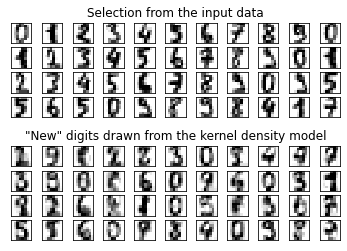

In [43]:
# load the data
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')
plt.show()

- data : 데이터 행렬을 벡터로 가지고 있는 데이터
- target : 분류된 라벨데이터.
- feature_names : data안 각 항목이 의미하는 이름
- target_names : 라벨의 종류
- digits.data와 digits.images의 다른 점
- 8x8 형태의 이미지를 한 row로 만든 것이 digits.data이다.

In [44]:
digits.data.shape, digits.images.shape

((1797, 64), (1797, 8, 8))

# Dataset

In [45]:
# train, test 데이터 분리 -> 위에서 import 했으니 따로 패키지 설치 X
# 모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
# X_train, X_test, y_train, y_test를 생성

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


- digits 데이터 셋을 학습용 데이터와 테스트용 데이터로 분리
- test 데이터 셋의 크기는 전체 데이터셋의 20%
- 즉, 1797개의 데이터 셋 중에서 학습용 데이터는 1437개, 테스트용 데이터는 360개
- 기존에 정렬된 데이터를 랜덤으로 섞어서 train set과 test set으로 분리

# 모델 학습 및 평가

- 다양한 모델로 학습시키기 위해서, 다음 5개의 모델을 구현
    - Decision Tree (decision_tree)
    - Random Forest (random_forest)
    - SVM (svm_model)
    - SGD Classifier (sgd_model)
    - Logistic Regression (logistic_model)

In [46]:
# Decision Tree 사용해 보기

from sklearn.tree import DecisionTreeClassifier

# 의사결정트리 정의 및 학습!
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

# 의사결정트리 예측!
y_pred = decision_tree.predict(X_test)
print(y_pred) # 예측값 출력
print(y_test) # 정답값 출력

print("이렇게 보니까 너무 구려요!! 그럼 어떻게? ==> 정확도와 report는 따로 출력해봅시다")
print("\n\n")
# 정확도만 봅시다
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred)

print("정확도 :", accuracy1)
print("\n\n")
# 이쁘게 리포트해봅시다
print("Classification report 입니다")
print(classification_report(y_test, y_pred))

[6 0 5 3 2 9 0 4 1 0 1 8 2 5 2 8 1 8 3 1 0 2 0 4 5 3 3 0 0 4 1 4 4 4 6 1 4
 0 6 6 0 5 3 6 6 2 0 1 9 6 2 8 2 9 0 2 0 8 4 6 8 5 8 7 2 7 7 2 2 4 5 5 4 6
 2 0 3 3 7 5 8 2 4 4 2 5 1 4 3 7 6 3 1 5 6 2 1 0 1 1 4 5 1 3 1 6 9 0 3 7 6
 9 3 8 0 1 3 8 8 6 3 7 3 9 0 9 0 9 3 1 2 2 3 6 9 4 0 1 8 3 9 1 0 8 5 0 7 2
 7 4 4 9 2 2 6 0 4 4 9 5 0 2 4 4 2 2 3 7 2 9 0 3 5 9 9 6 8 4 5 3 0 4 2 1 3
 3 6 0 8 1 4 1 4 7 5 7 6 6 8 1 0 6 1 7 1 1 9 8 5 5 3 6 6 1 2 0 7 5 3 0 8 2
 0 4 0 9 4 6 4 7 9 5 3 6 2 5 2 5 9 3 9 9 2 2 1 6 4 1 7 5 9 8 9 5 7 4 3 7 4
 8 2 8 9 5 3 2 1 0 4 2 1 0 1 4 1 7 6 4 7 7 9 8 3 8 4 3 5 9 4 4 8 1 8 7 2 3
 2 1 1 0 2 8 0 7 4 3 1 0 2 3 9 9 8 5 6 2 2 6 5 0 8 9 8 9 0 0 4 7 4 1 9 6 7
 3 7 4 0 2 1 7 6 5 3 2 3 5 7 1 4 1 3 3 8 8 1 0 1 9 8 0]
[6 0 5 9 2 9 0 4 1 0 1 8 2 5 2 8 1 8 9 1 0 2 0 4 5 3 3 0 0 4 1 4 4 4 6 1 4
 0 6 6 0 9 3 6 6 2 0 1 9 6 2 8 9 9 0 2 0 8 4 6 8 5 8 7 8 7 7 4 1 4 5 5 4 6
 2 0 1 3 7 5 8 2 4 4 2 5 1 9 3 7 6 3 3 5 6 2 1 0 1 9 4 1 1 3 1 6 9 0 3 7 6
 9 3 8 0 8 3 8 8 6 3 7 3 9 0 3 0 9 8 1 2 2 3

In [47]:
# Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# 정확도만 봅시다
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_pred)
print("정확도 :", accuracy2)
print("\n\n")

print("report")
print(classification_report(y_test, y_pred))

정확도 : 0.9694444444444444



report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        33
           3       1.00      0.95      0.97        40
           4       0.98      1.00      0.99        40
           5       0.95      0.97      0.96        37
           6       1.00      0.94      0.97        35
           7       1.00      0.95      0.97        38
           8       0.88      0.94      0.91        31
           9       0.91      0.94      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [48]:
# SVM 사용해 보기
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 정확도만 봅시다
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, y_pred)
print("정확도 :", accuracy3)
print("\n\n")

print("report")
print(classification_report(y_test, y_pred))

정확도 : 0.9861111111111112



report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        40
           4       1.00      1.00      1.00        40
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        38
           8       0.94      1.00      0.97        31
           9       0.94      0.94      0.94        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [49]:
# SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# 정확도만 봅시다
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, y_pred)
print("정확도 :", accuracy4)
print("\n\n")

print("report")
print(classification_report(y_test, y_pred))

정확도 : 0.9583333333333334



report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        36
           2       1.00      1.00      1.00        33
           3       1.00      0.90      0.95        40
           4       0.95      1.00      0.98        40
           5       1.00      1.00      1.00        37
           6       0.97      0.94      0.96        35
           7       0.97      0.95      0.96        38
           8       0.84      0.87      0.86        31
           9       0.94      0.91      0.93        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [50]:
# Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# 정확도만 봅시다
from sklearn.metrics import accuracy_score
accuracy5 = accuracy_score(y_test, y_pred)
print("정확도 :", accuracy5)
print("\n\n")

print("report")
print(classification_report(y_test, y_pred))

정확도 : 0.9861111111111112



report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        40
           4       1.00      1.00      1.00        40
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        38
           8       0.94      1.00      0.97        31
           9       0.94      0.94      0.94        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# 정확도 비교
print('Decision Tree 정확도 : ', accuracy1)
print('Random Forest : ', accuracy2)
print('SVM 사용해 보기 : ', accuracy3)
print('SGD Classifier : ' , accuracy4)
print('Logistic Regression : ', accuracy5)

Decision Tree 정확도 :  0.8555555555555555
Random Forest :  0.9694444444444444
SVM 사용해 보기 :  0.9861111111111112
SGD Classifier :  0.95
Logistic Regression :  0.9861111111111112
